In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('income_evaluation.csv')

In [3]:
#data description
df.head()
df.describe()
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country', 'income']

In [6]:
#target variable
print(df.income.unique())
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]

[' <=50K' ' >50K']


In [7]:
#get all the categorical variables
cat_var = [var for var in df.columns if df[var].dtype == "O"]
cat_var

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [8]:
#get the value count
for var in df[cat_var]:
    print(df[var].value_counts())
    print("_____________________")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
_____________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
_____________________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_status, dtype: int64
_____________________
 Pro

In [9]:
#remove the ? sign
df = df.replace(" ?", np.nan)

In [10]:
#droping the null values
df = df.dropna()
df.isnull().mean()*100

age               0.0
workclass         0.0
final_weight      0.0
education         0.0
education_num     0.0
martial_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hrs_per_week      0.0
native_country    0.0
income            0.0
dtype: float64

In [20]:
#convert the label class in the num
def label_category(var):
    label = {v:k for k, v in enumerate(df[var].unique())}
    print(label)
    df[var] = df[var].map(label)
    print("label task completed")

In [21]:
label_category('education')

{' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' 7th-8th': 7, ' Doctorate': 8, ' Assoc-voc': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12, ' Preschool': 13, ' 12th': 14, ' 1st-4th': 15}
label task completed


In [ ]:
label_category('workclass')

In [23]:
label_category('native_country')

{' United-States': 0, ' Cuba': 1, ' Jamaica': 2, ' India': 3, ' Mexico': 4, ' Puerto-Rico': 5, ' Honduras': 6, ' England': 7, ' Canada': 8, ' Germany': 9, ' Iran': 10, ' Philippines': 11, ' Poland': 12, ' Columbia': 13, ' Cambodia': 14, ' Thailand': 15, ' Ecuador': 16, ' Laos': 17, ' Taiwan': 18, ' Haiti': 19, ' Portugal': 20, ' Dominican-Republic': 21, ' El-Salvador': 22, ' France': 23, ' Guatemala': 24, ' Italy': 25, ' China': 26, ' South': 27, ' Japan': 28, ' Yugoslavia': 29, ' Peru': 30, ' Outlying-US(Guam-USVI-etc)': 31, ' Scotland': 32, ' Trinadad&Tobago': 33, ' Greece': 34, ' Nicaragua': 35, ' Vietnam': 36, ' Hong': 37, ' Ireland': 38, ' Hungary': 39, ' Holand-Netherlands': 40}
label task completed


In [25]:
label_category("occupation")

{' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Transport-moving': 6, ' Farming-fishing': 7, ' Machine-op-inspct': 8, ' Tech-support': 9, ' Craft-repair': 10, ' Protective-serv': 11, ' Armed-Forces': 12, ' Priv-house-serv': 13}
label task completed


In [26]:
label_category("martial_status")

{' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}
label task completed


In [28]:
label_category("relationship")

{' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}
label task completed


In [29]:
label_category("race")

{' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4}
label task completed


In [30]:
label_category("sex")

{' Male': 0, ' Female': 1}
label task completed


In [31]:
df.head()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


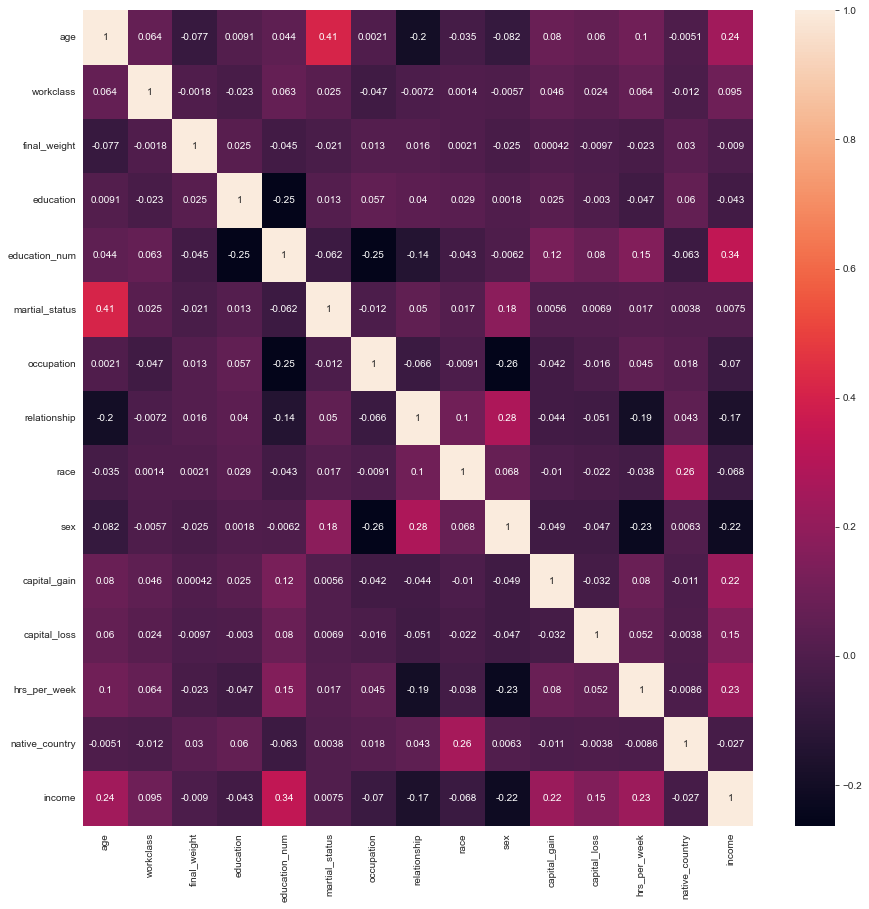

In [32]:
#correlation
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [34]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
X = X.values
y = y.values

sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.04279571, -2.25653747, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [ 0.88028814, -1.18675527, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.23923831],
       [-0.03333996, -0.11697307,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.23923831],
       ...,
       [ 1.48937355, -0.11697307, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [-1.25151078, -0.11697307,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.23923831],
       [ 1.0325595 ,  3.09237353,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.23923831]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:

# Creating a decision tree model with entropy as the criterion
model = DecisionTreeClassifier(criterion="entropy",  max_features=14, max_depth=10)

# Using cross-validation to evaluate the model
scores = cross_val_score(model, X, y, cv=5)

# Printing the cross-validation scores
print("Cross-Validation Scores:", scores)

# Fitting the model on the training set
model.fit(X_train, y_train)

# Predicting the labels of the test set
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Cross-Validation Scores: [0.84435604 0.84468755 0.85543767 0.85842175 0.85560345]
Accuracy: 0.8537959995579623
Confusion Matrix:
 [[6313  454]
 [ 869 1413]]


--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6767
           1       0.76      0.62      0.68      2282

    accuracy                           0.85      9049
   macro avg       0.82      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

------------------------------------------Accuracy Score---------------------------------------------------------
0.8542380373521936
--------------------------------------------Confustion Matrix-----------------------------------------------------


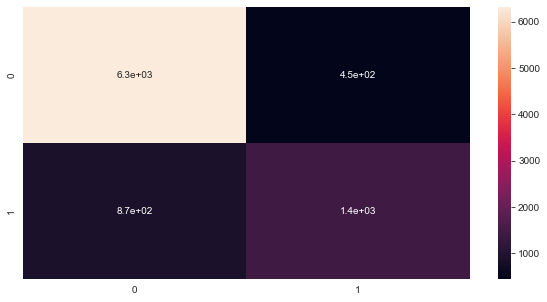

In [51]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, y_pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, y_pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [52]:
## Creating a Random Forest model with 100 trees
model = RandomForestClassifier(n_estimators=500)

# Using cross-validation to evaluate the model
scores = cross_val_score(model, X, y, cv=5)

# Printing the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculating the mean cross-validation score
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Cross-Validation Scores: [0.85082049 0.84883143 0.85676393 0.86041114 0.85527188]
Mean Cross-Validation Score: 0.854419772814507
Confusion Matrix:
 [[6315  452]
 [ 867 1415]]


--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6767
           1       0.76      0.62      0.68      2282

    accuracy                           0.85      9049
   macro avg       0.82      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

------------------------------------------Accuracy Score---------------------------------------------------------
0.8542380373521936
--------------------------------------------Confustion Matrix-----------------------------------------------------


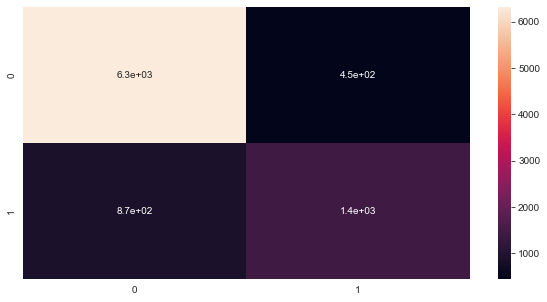

In [53]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, y_pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, y_pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [57]:
import pickle
import os
import zipfile

In [60]:
print("Export the model to model.pkl")
f = open("model.pkl","wb")
pickle.dump(model, f)
f.close()

Export the model to model.pkl


In [61]:
zipfile.ZipFile('model.zip',mode='w').write("model.pkl")